In [20]:
!sqlite3 -version

3.33.0 2020-08-14 13:23:32 fca8dc8b578f215a969cd899336378966156154710873e68b3d9ac5881b0alt2


In [6]:
!sqlite3 E:/Downloads/InternetSpeed.db ".databases"

main: E:\Downloads\InternetSpeed.db


In [6]:
!pip install C:\Users\andre\Downloads\PyICU-2.6-cp38-cp38-win_amd64.whl

Processing c:\users\andre\downloads\pyicu-2.6-cp38-cp38-win_amd64.whl


In [7]:
!pip install csvkit

  Using cached csvkit-1.0.5.tar.gz (3.8 MB)
  Using cached agate-1.6.2.tar.gz (191 kB)
  Using cached agate-excel-0.2.3.tar.gz (153 kB)
  Using cached agate-dbf-0.2.2.tar.gz (2.9 kB)
  Using cached agate-sql-0.5.6.tar.gz (9.1 kB)
  Using cached pytimeparse-1.1.8-py2.py3-none-any.whl (10.0 kB)
  Using cached parsedatetime-2.6-py3-none-any.whl (42 kB)
  Using cached isodate-0.6.0-py2.py3-none-any.whl (45 kB)
  Using cached python-slugify-4.0.1.tar.gz (11 kB)
  Using cached leather-0.3.3-py3-none-any.whl (35 kB)
  Created wheel for csvkit: filename=csvkit-1.0.5-py3-none-any.whl size=41632 sha256=cc7dcd7520acc49f161f53ea85b2312382ea40c91872a07f7ac701828a0e09ce
  Stored in directory: c:\users\andre\appdata\local\pip\cache\wheels\3c\ae\39\f7a6ac5302a582f6453a763e8d7d936292be5d0c132742c2d3
  Created wheel for agate: filename=agate-1.6.2-py2.py3-none-any.whl size=98864 sha256=04b85701c95524ebe0a2d06b70f4ee287a6cf3faa7b8da5a583c518cb485bb3c
  Stored in directory: c:\users\andre\appdata\local\pi

In [8]:
!test -e InternetSpeed.db && rm InternetSpeed.db
!csvsql --db sqlite:///InternetSpeed.db --insert E:/Downloads/LA_wifi_speed_UK.csv

"test" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
c:\users\andre\anaconda3\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses


In [9]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [11]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10'
cur.execute(query)

In [12]:
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [13]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print(row)

('2016-12-02 21:30:00.000000',)
('2016-12-10 01:30:00.000000',)
('2016-11-24 11:00:00.000000',)
('2016-12-12 13:30:00.000000',)
('2016-12-04 22:00:00.000000',)
('2016-11-30 18:30:00.000000',)
('2016-12-03 05:00:00.000000',)
('2016-12-07 17:30:00.000000',)
('2016-12-01 07:00:00.000000',)
('2016-11-26 20:30:00.000000',)


In [14]:
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

In [15]:
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [16]:
columns = [member[0] for member in cur.description]

columns = columns[1:]

In [17]:
columns = [c.replace('_p', '') for c in columns]
columns = [c.replace('_d', '') for c in columns]
columns = [c.replace('_u', '') for c in columns]
columns = list(set(columns))

In [18]:
columns[:10]

['E06000017',
 'E07000194',
 'E08000013',
 'E07000094',
 'E06000052',
 'E06000034',
 'E07000027',
 'E09000006',
 'E06000056',
 'E07000068']

In [19]:
area = columns[0]
print(area)

E06000017


In [20]:
suffix = {'_p':'ping','_d':'download','_u':'upload'}
print(suffix.keys())
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E06000017')

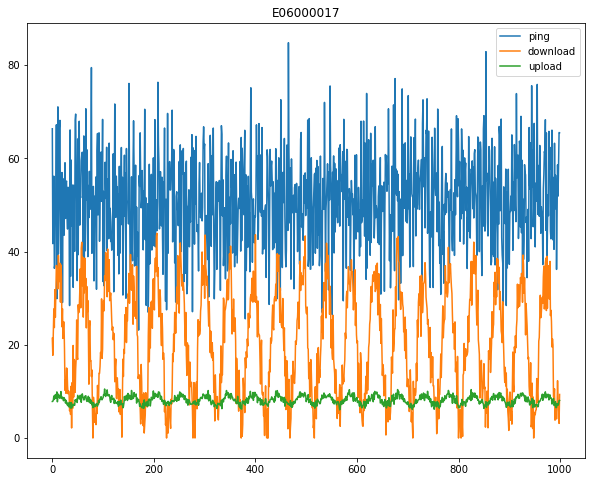

In [21]:
plt.figure(figsize=(10,8))

for s in suffix.keys():
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area,s)
    cur.execute(query)
    plt.plot(cur.fetchall(),label=suffix[s])
plt.legend()
plt.title(area)

In [22]:
new_columns = ['Area', 'Average_p', 'Average_d', 'Average_u']
df = pd.DataFrame(columns = new_columns)

In [23]:
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i],s)
        
        cur.execute(query)
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    df = df.append(pd.Series(tmp_list, index = new_columns), ignore_index = True)
df.head()

,Area,Average_p,Average_d,Average_u
0,E06000017,50.992436,20.572656,8.153301
1,E07000194,52.111039,20.892161,8.355531
2,E08000013,53.490657,21.594366,8.631623
3,E07000094,52.236409,21.220158,8.432513
4,E06000052,59.742131,25.161968,9.963647


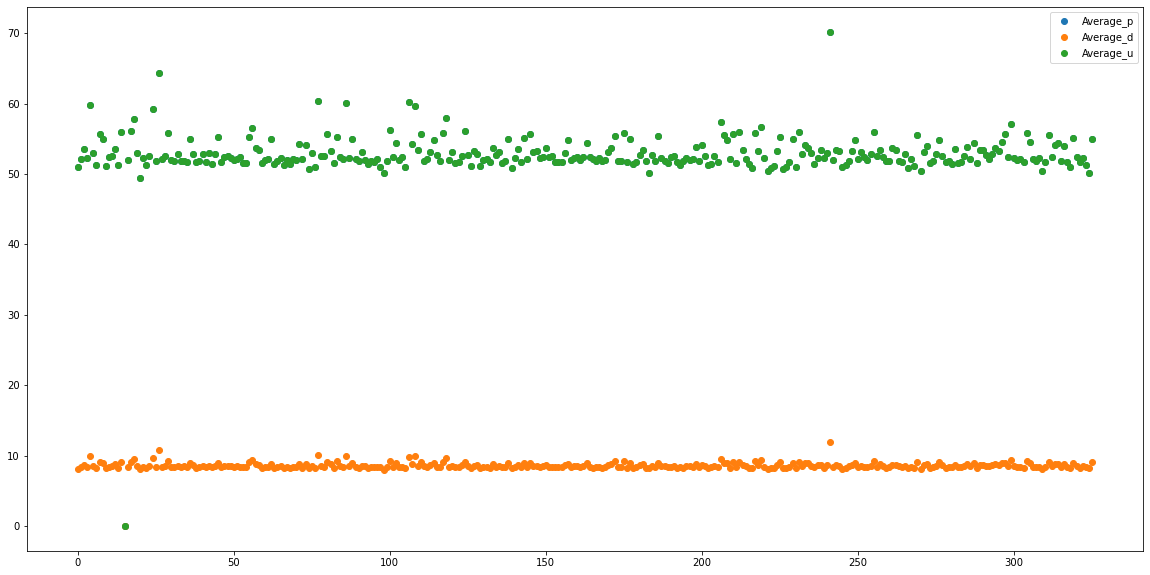

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Average_p', 'Average_u', 'Average_p']], 'o')
plt.legend(['Average_p', 'Average_d', 'Average_u'])

In [25]:
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass
df.to_sql('average_speed',conn)

In [26]:
query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)

print(cur.fetchone())
print(cur.fetchone())

(0, 'E06000017', 50.99243580340266, 20.572656372260788, 8.153301424197002)
(1, 'E07000194', 52.11103901321929, 20.892160562907634, 8.355531143729888)


In [27]:
conn.close()

In [28]:
!csvsql --db sqlite:///InternetSpeed.db --insert E:/Downloads/LA_population.csv

c:\users\andre\anaconda3\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses


In [29]:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [30]:
query = 'SELECT * FROM LA_population LIMIT 10'
cur.execute(query)
for row in cur:
    print(row)

('Aberdeen City', 'S12000033', 222793.0)
('Aberdeenshire', 'S12000034', 252973.0)
('Adur', 'E07000223', 61182.0)
('Allerdale', 'E07000026', 96422.0)
('Amber Valley', 'E07000032', 122309.0)
('Angus', 'S12000041', 115978.0)
('Antrim and Newtownabbey', 'N09000001', 138567.0)
('Ards and North Down', 'N09000011', 156672.0)
('Argyll and Bute', 'S12000035', 88166.0)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693.0)


In [31]:
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population. "LA_code"=average_speed.Area'
cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print(row)
    k+=1

(0, 'E06000017', 50.99243580340266, 20.572656372260788, 8.153301424197002, 'Rutland', 'E06000017', 37369.0)
(1, 'E07000194', 52.11103901321929, 20.892160562907634, 8.355531143729888, 'Lichfield', 'E07000194', 100654.0)
(2, 'E08000013', 53.49065740151429, 21.594365770886878, 8.631623487674833, 'St. Helens', 'E08000013', 175308.0)
(3, 'E07000094', 52.236408904251086, 21.220158212642453, 8.432513187192598, 'Winchester', 'E07000094', 116595.0)
(4, 'E06000052', 59.742131064954066, 25.161968368216442, 9.963646810663299, 'Cornwall', 'E06000052', 532273.0)
(5, 'E06000034', 52.93018341868918, 21.427739197796747, 8.5996937317735, 'Thurrock', 'E06000034', 157705.0)
(6, 'E07000027', 51.25561887431051, 20.823834578155743, 8.274819936972126, 'Barrow-in-Furness', 'E07000027', 69087.0)
(7, 'E09000006', 55.73765093615205, 23.02210453336063, 9.115770228786074, 'Bromley', 'E09000006', 309392.0)
(8, 'E06000056', 55.01728647523161, 22.498283285930224, 8.934629094756, 'Central Bedfordshire', 'E06000056', 25